In [2]:
library(dplyr)
library(ggplot2)

# Exploratory Data Analysis 

+ Ask Questions -> Answer them with your data -> modify/generate new questions.
+ The goal during EDA is getting familiar with your data.


+ There are no right questions for every data set, but your can refomulate these:
    * What type of variation occurs **within** my variables?
    * What type of covariation occurs **between** my variables?
    
    
+ Some definitions to make our lives easier:
    * A **variable** is a quantity, quality, or property that you can measure.
    * A **value** is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.
    * An **observation** is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable. I’ll sometimes refer to an observation as a data point.
    * **Tabular data** is a set of values, each associated with a variable and an observation. Tabular data is tidy if each value is placed in its own “cell”, each variable in its own column, and each observation in its own row.

## 1.Variation

### Visualising Distributions

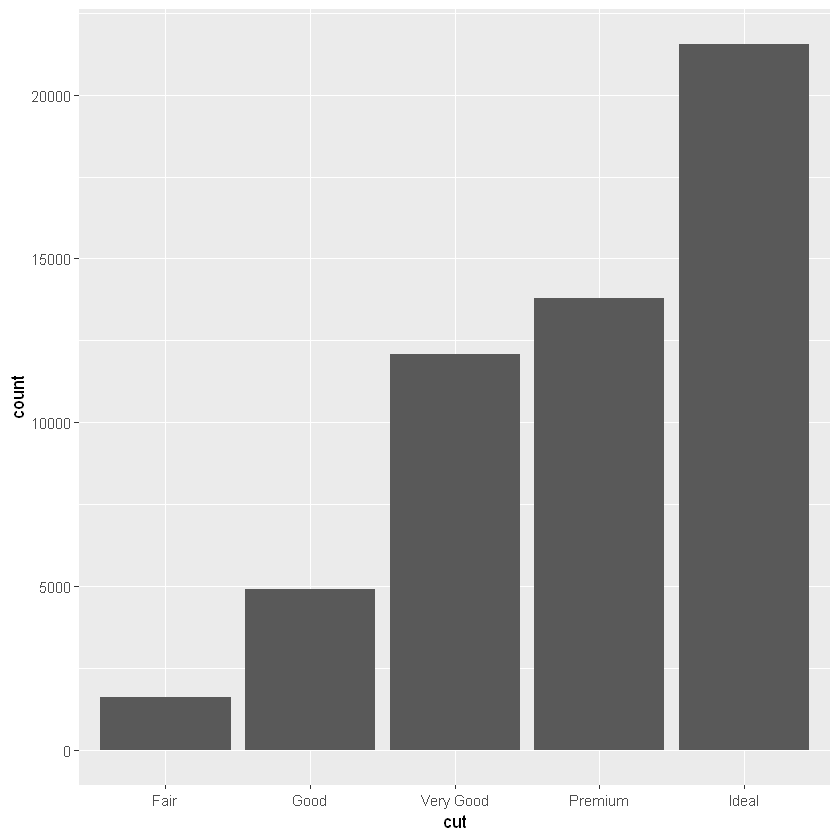

In [20]:
ggplot(data=diamonds) +
    geom_bar(mapping=aes(x=cut))

In [21]:
diamonds %>%
    count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


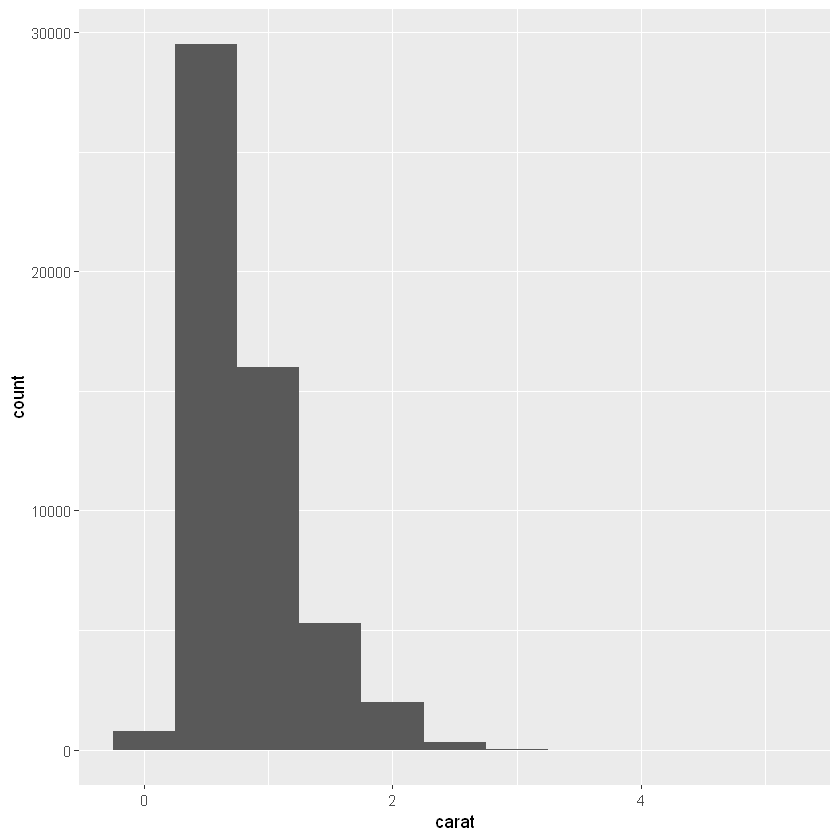

In [27]:
ggplot(data=diamonds) +
    geom_histogram(mapping=aes(x=carat),binwidth=0.5)

In [31]:
diamonds %>%
    count(cut_width(carat,0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


In [29]:
summary(diamonds$carat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.4000  0.7000  0.7979  1.0400  5.0100 

### Typical Values

Warning message:
"Ignoring unknown parameters: binwidht"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



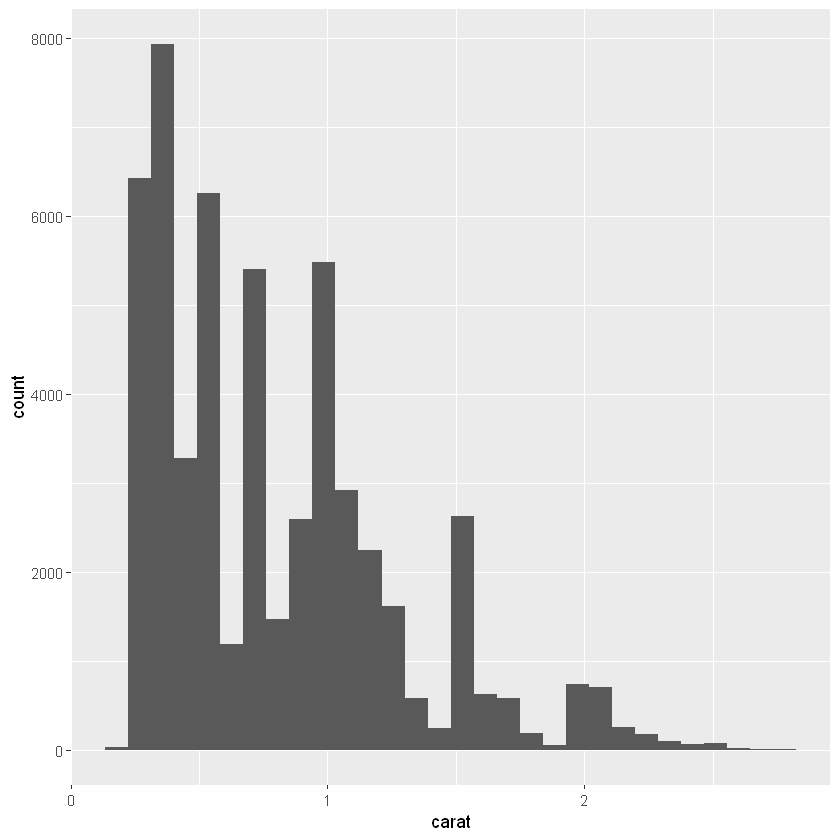

In [38]:
smaller <- diamonds %>%
    filter(carat < 3)

ggplot(data=smaller) +
    geom_histogram(mapping=aes(x=carat),binwidht=0.1)

Warning message:
"Ignoring unknown parameters: binwidht"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



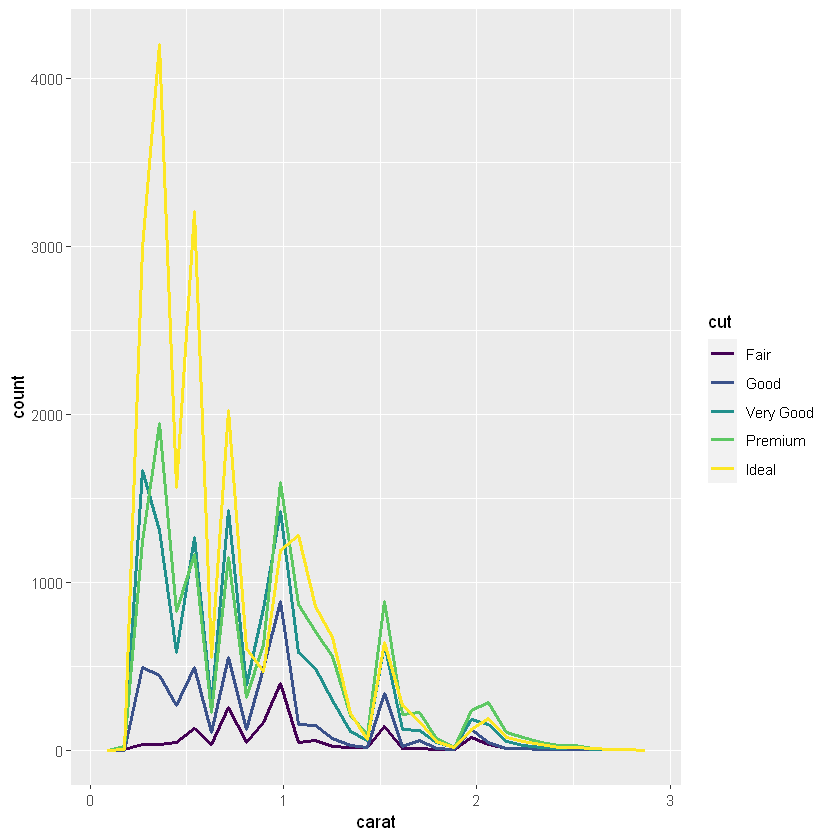

In [43]:
ggplot(data=smaller,mapping=aes(x=carat,color=cut)) +
    geom_freqpoly(binwidht=0.1,size=0.9)

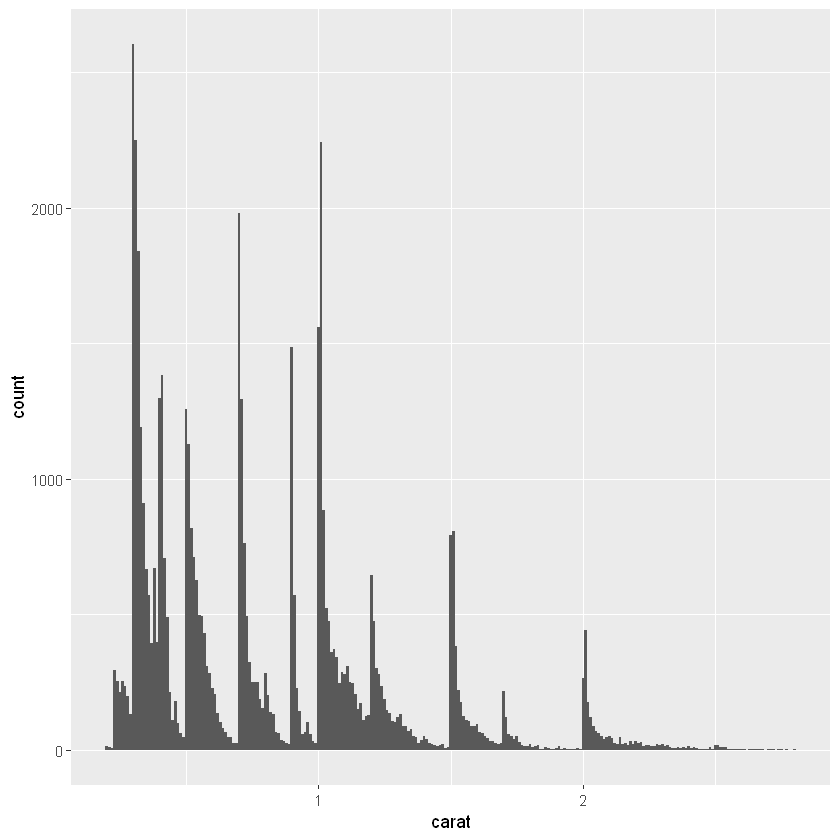

In [54]:
ggplot(data=smaller,mapping=aes(x=carat)) +
    geom_histogram(binwidth=0.01)

* Cart distrbution is multimodal and right skewed.
* The histogram above suggests some interesting questions:
    - Why there are more diamonds at whole and common fractions of carats? (eg: 1-2-1.5-0.2)
    - Why are there more diamonds slightly to the right of each peak than there are to the left of each peak?
    - Why are there no diamonds bigger than 3 carats?
    
    
* Clusters of similar values suggest that subgroups exist in the data.
    - How are the observations within each cluster similar to each other?
    - How are the observations in seperate cluster different from each other?
    - How can you explain or describe the clusters?
    - Why might the appearance of cluster be misleading?

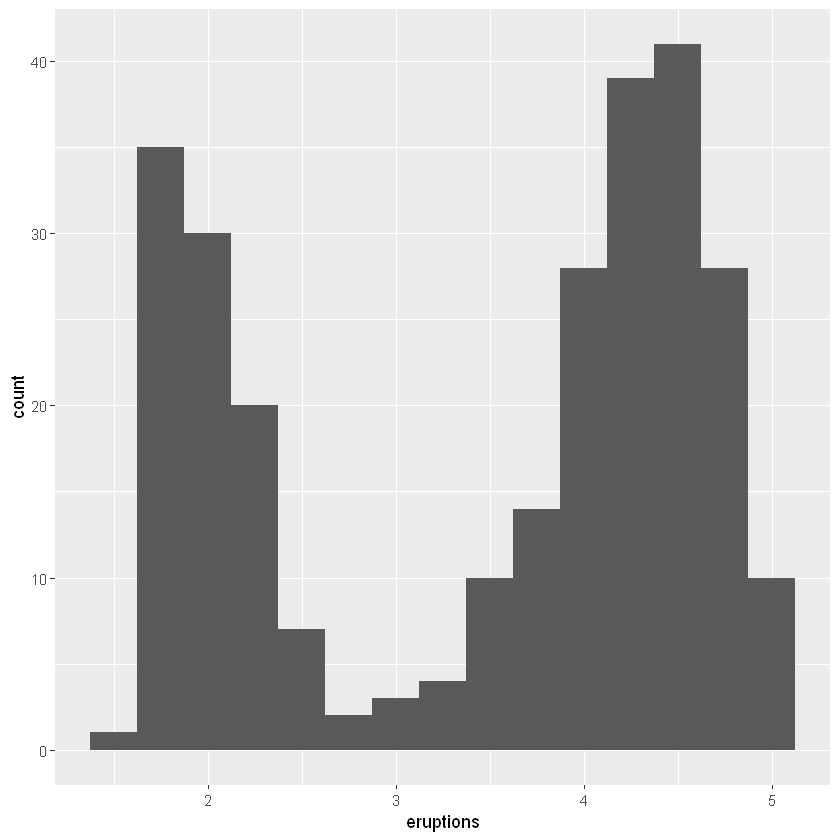

In [55]:
ggplot(data=faithful, mapping=aes(x=eruptions)) +
    geom_histogram(binwidth=0.25)

We can see that erruption times are clustering into 2 subcategories, short erruptions (around 2 minutes) and long time erruptions (4~5 minutes), how can we explain this behavior? is there another variable that can explain the variation in eruption times?

### Unusual values

AKA: outliers or as i like to call them outliaaaaars.

In [56]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


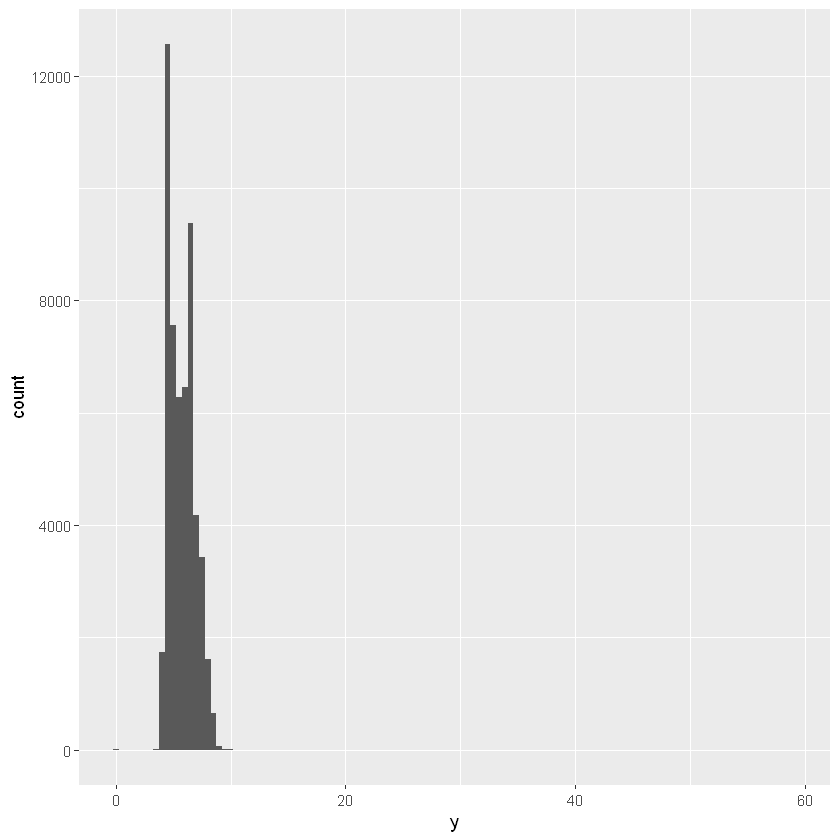

In [58]:
ggplot(data=diamonds,mapping=aes(x=y)) +
    geom_histogram(binwidth=0.5)

Because there is so much data, you can't really see the outliers, the only evidence we have for now is the unusual wide limit in the x-axis.


To see our outliers we need to zoom in (AKA: reducing the y-lim in the y-axis) to see the outliers.

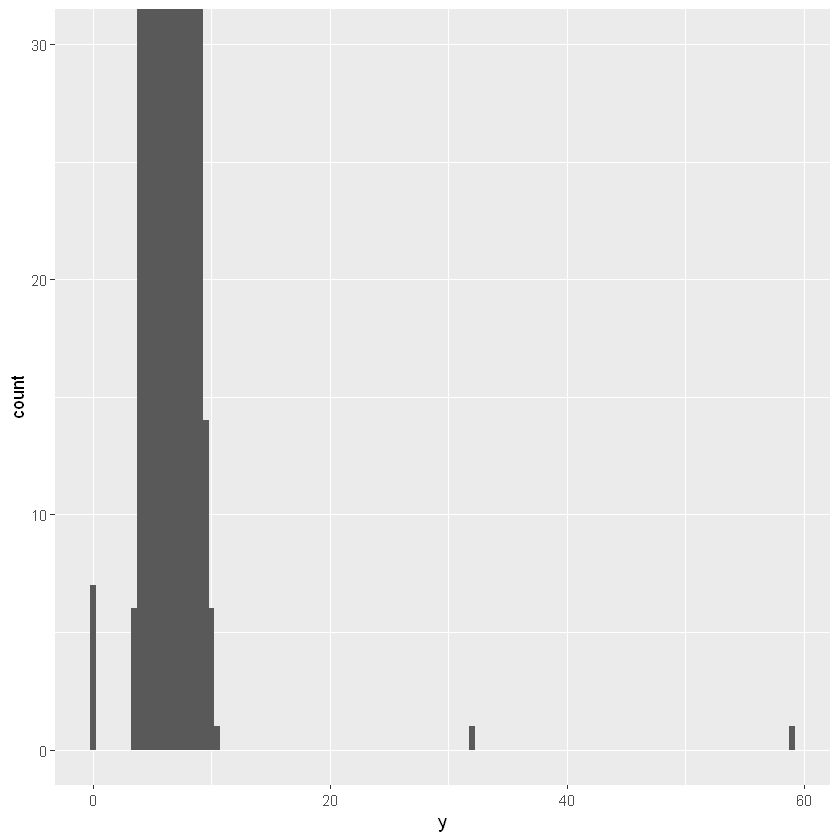

In [60]:
ggplot(data=diamonds,mapping=aes(x=y)) +
    geom_histogram(binwidth=0.5) +
    coord_cartesian(ylim=c(0,30))

We can see now the unusual values in our data, 0, ~30, ~60.

We can pluck (extract) these values using dplyr

In [62]:
unusual <- diamonds %>%
    filter(y < 3 | y > 20) %>%
    select(price,x,y,z) %>%
    arrange(y)

unusual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


We can tell right away that 7 out of these 9 values are incorrect.


We can also suspect that 32mm and 59mm are implausible, what kind of diamond that has a width of 32~59 without costing hundreds of dollars?!

#### Exercices and more EDA

In [65]:
mesure <- diamonds %>%
    select(price,x,y,z)

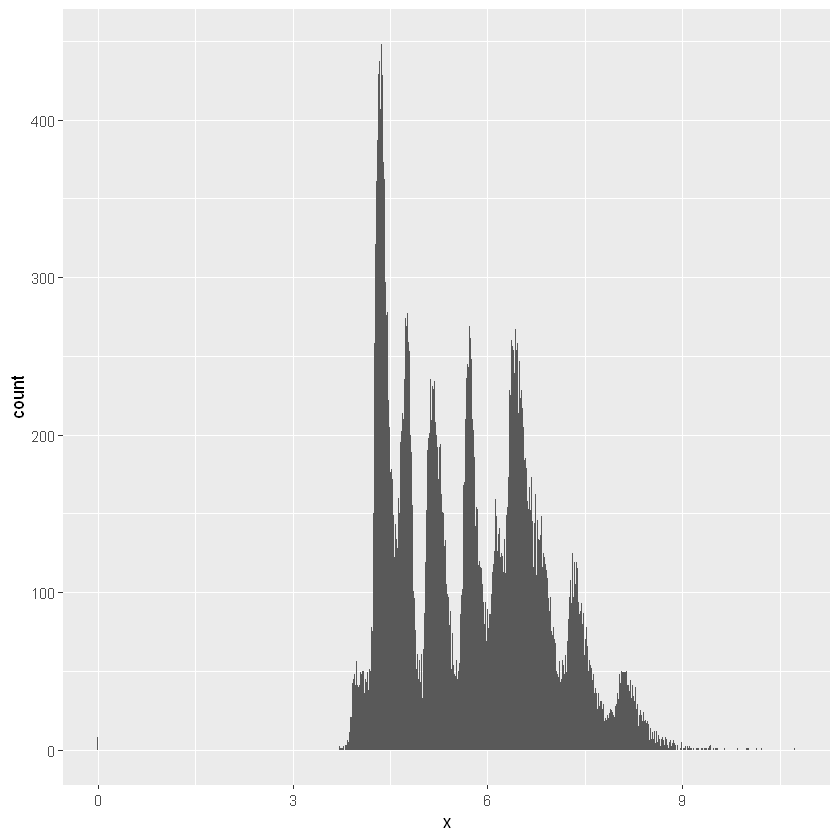

In [66]:
ggplot(data=mesure,mapping=aes(x=x)) +
    geom_histogram(binwidth=0.01)

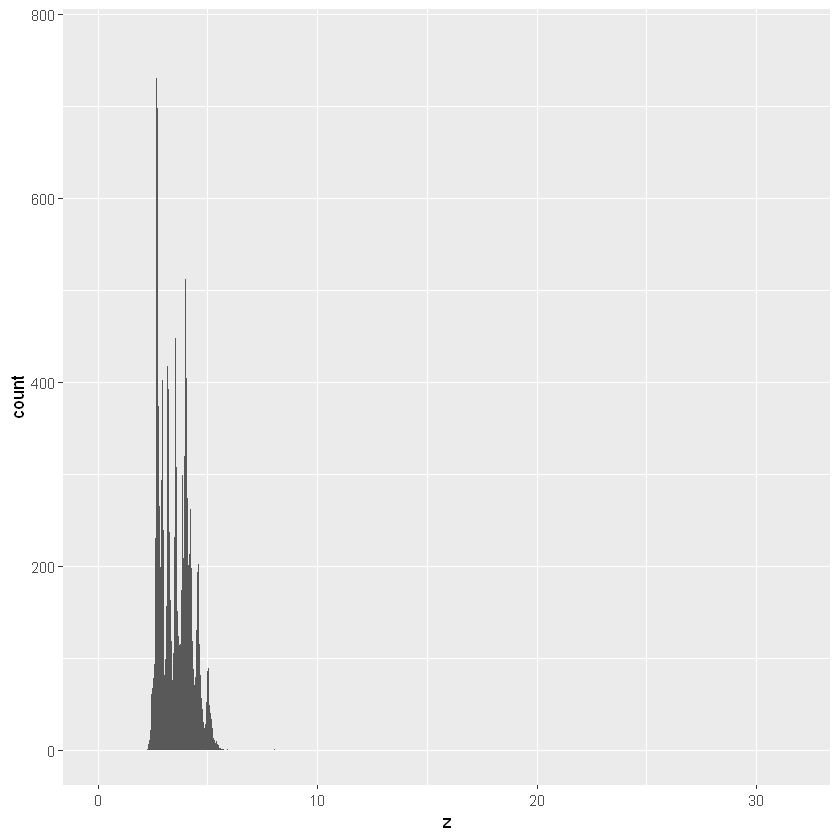

In [73]:
ggplot(data=mesure,mapping=aes(x=z)) +
    geom_histogram(binwidth=0.01)

In [84]:
typical <- mesure %>%
    filter(between(x,4,9),between(y,50,10),between(z,3,6))

dim(typical)

[1] 0 4

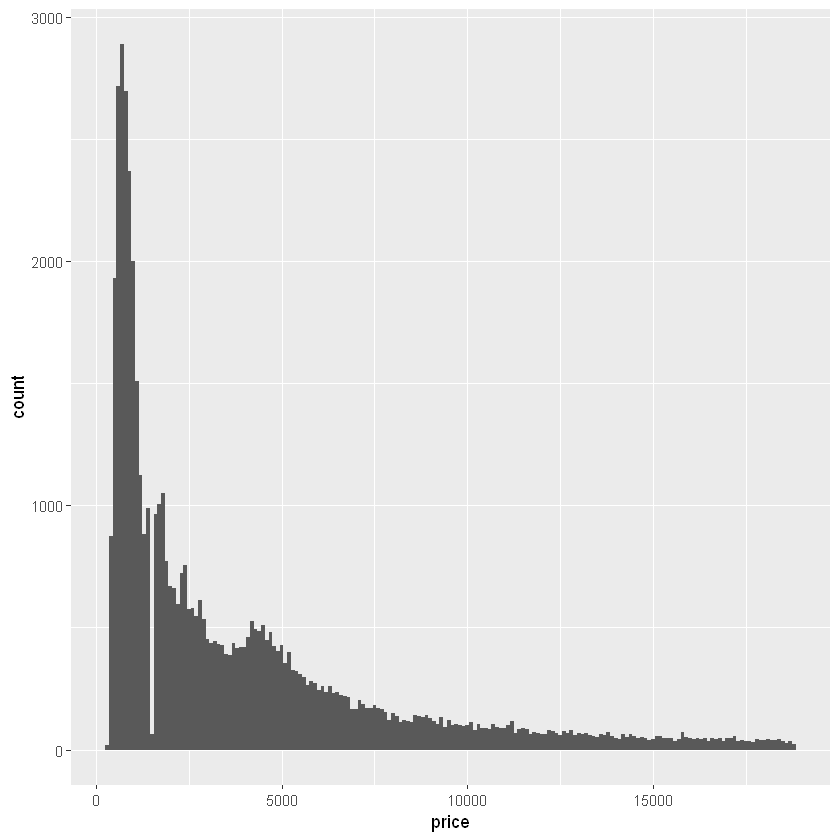

In [86]:
ggplot(data=mesure,mapping=aes(x=price)) +
    geom_histogram(binwidth=100)

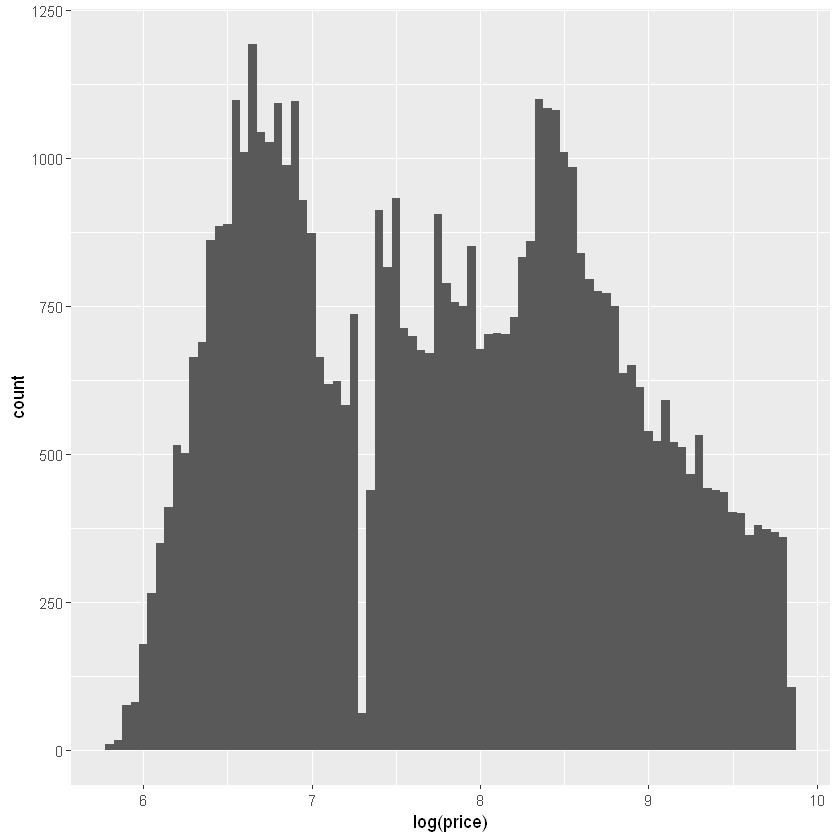

In [100]:
ggplot(data=mesure,mapping=aes(x=log(price))) +
    geom_histogram(binwidth=0.05)

In [110]:
diamonds %>%
    filter(carat==0.99) %>% count(carat)

carat,n
<dbl>,<int>
0.99,23


In [111]:
diamonds %>% filter(carat==1) %>% count(carat)

carat,n
<dbl>,<int>
1,1558


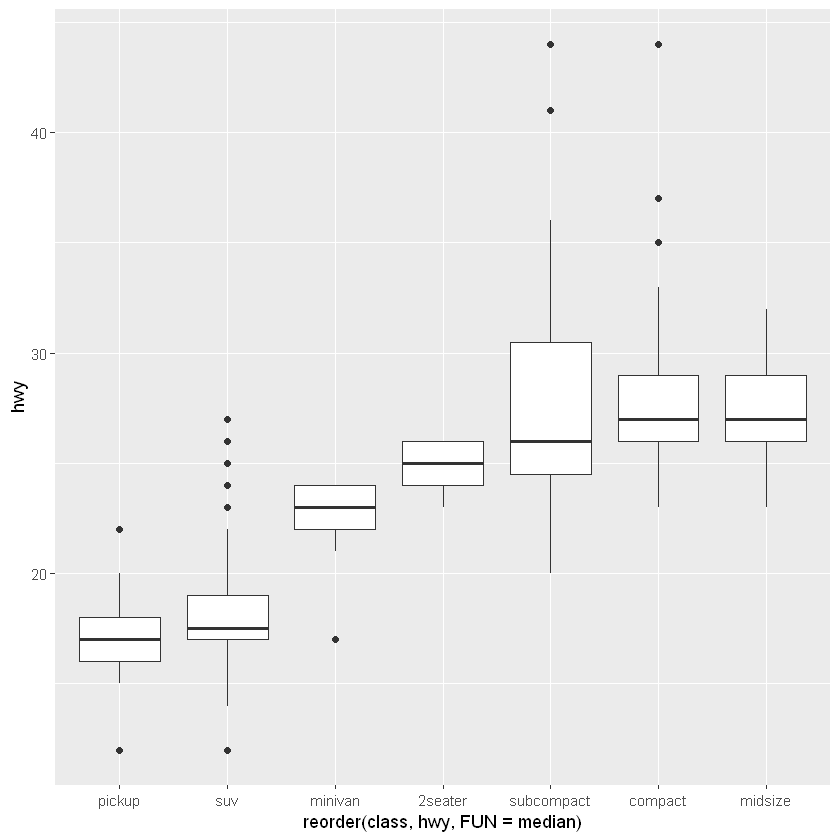

In [112]:
ggplot(data=mpg) +
    geom_boxplot(mapping=aes(x=reorder(class,hwy,FUN=median),y=hwy))

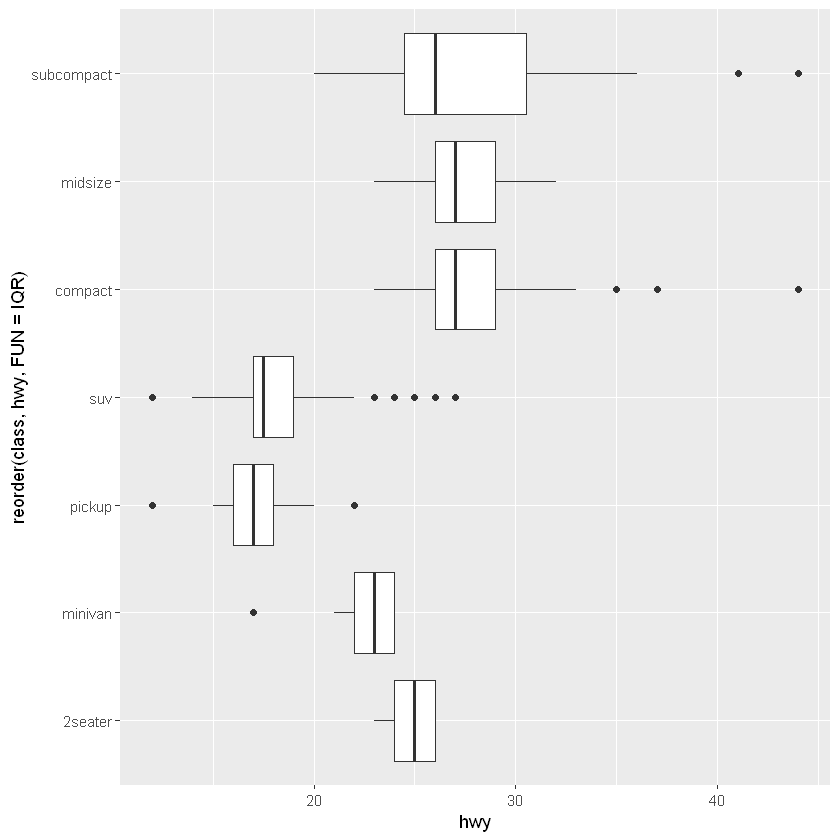

In [114]:
ggplot(data=mpg) +
    geom_boxplot(mapping=aes(x=reorder(class,hwy,FUN=IQR),y=hwy)) +
    coord_flip()